### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [1]:
!python setup.py build_ext --inplace 

running build_ext
running build_ext


# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help

data_dir = "./Data/"
figure_dir = "./Figures/"

2023-04-18 18:44:32,741	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 192.168.1.152:6379


# Choose the experiment and create the main pipeline

In [4]:
#Choose the experiment
experimentchoice = 'stopsignal'

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

in choose pipeline
in reward pipeline


In [5]:
#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [6]:
environment = {
    'experimentchoice': experimentchoice,
    'inter_trial_interval':500.,
    'thalamic_threshold':35.,
    'movement_time':None,#default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None,#default 1000
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop - STN
    'stop_signal_present': False,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #Stop- D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1., # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["weight","optogenetic_input"],
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': 2.4, # ampitude of the stop signal over base line
    'opt_signal_onset': 20., # in ms
    'opt_signal_duration': 100.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPeA"],
}

In [7]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)  

SpawnThreadManagers <backend.Pipeline object at 0x7f5871d70880>
SpawnThreadManagers <backend.Pipeline object at 0x7f5878a2e790>
SpawnThreadManagers <backend.Pipeline object at 0x7f5878a2ea00>
(worker pid=2711588) in choose pipeline
(worker pid=2711588) in choose pipeline
(worker pid=2711588) trial wise mt [253. 251. 251.]
(worker pid=2711588) trial wise mt [253. 251. 251.]
(worker pid=2711588) conflict (1.0, 0.0)
(worker pid=2711588) change points: [0 1 2 2]
(worker pid=2711588) conflict (1.0, 0.0)
(worker pid=2711588) conflict (1.0, 0.0)
(worker pid=2711588) change points: [0 1 2 2]
(worker pid=2711588) conflict (1.0, 0.0)
(worker pid=2711588) <class 'float'>
(worker pid=2711588) [1 0 2]
(worker pid=2711588) <class 'float'>
(worker pid=2711588) [1 0 2]
(worker pid=2711588) <class 'float'>
(worker pid=2711588) [1 2 0]
(worker pid=2711588) <class 'float'>
(worker pid=2711588) [1 2 0]
SpawnThreadManagers <backend.Pipeline object at 0x7f57641f6af0>
(worker pid=2711588) begin GenOptSchedul

(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df

(worker pid=2711588) agent.opt_popids [6 7]
(worker pid=2711588) agent.opt_popids [6 7]
(worker pid=2711588) gateFRs [32.66666667 29.11111111]
(worker pid=2711588) thresholds_crossed []
(worker pid=2711588) gateFRs [32.66666667 29.11111111]
(worker pid=2711588) thresholds_crossed []


(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)


(worker pid=2711588) trial_num 0
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 0
(worker pid=2711588) trial_num 0
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 0
(worker pid=2711588) gateFRs [30.         31.11111111]
(worker pid=2711588) thresholds_crossed []
(worker pid=2711588) gateFRs [30.         31.11111111]
(worker pid=2711588) thresholds_crossed []


(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)


(worker pid=2711588) trial_num 1
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 1
(worker pid=2711588) trial_num 1
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 1
(worker pid=2711588) gateFRs [31.11111111 32.66666667]
(worker pid=2711588) thresholds_crossed []
(worker pid=2711588) gateFRs [31.11111111 32.66666667]
(worker pid=2711588) thresholds_crossed []


(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)
(worker pid=2711588) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:204: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2711588)   Q_df = Q_df.append(new_data)


(worker pid=2711588) trial_num 2
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 2
(worker pid=2711588) trial_num 2
(worker pid=2711588)   action
(worker pid=2711588) 0   left
(worker pid=2711588) 1  right
(worker pid=2711588) chosen_action: none
(worker pid=2711588) trial_num 2


In [8]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onse

In [9]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:219: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [10]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]


,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,none,0,301,301,555,555,left,0
1,none,1056,1357,301,553,1609,right,0
2,none,2110,2411,301,553,2663,left,0


In [11]:
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    254
1    252
2    252
dtype: object

In [12]:
len(datatables)

1

In [13]:
datatables[0].iloc[0]

decision                     none
stimulusstarttime               0
decisiontime                  301
decisionduration              301
decisiondurationplusdelay     555
rewardtime                    555
correctdecision              left
reward                          0
Name: 0, dtype: object

In [14]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,GPeA_left,GPeA_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,81.111111,76.000000,22.466667,23.111111,48.700000,46.666667,10.200000,15.200000,1.111111,2.666667,1.333333,1.777778,0.000000,0.000000,6.000000,7.777778,7.777778,0.896057,0
1,81.333333,76.000000,22.577778,23.333333,48.800000,46.733333,10.333333,15.000000,1.333333,2.666667,1.333333,1.777778,0.000000,0.000000,6.222222,7.777778,7.777778,0.896057,1
2,81.111111,76.000000,22.533333,23.355556,48.733333,46.800000,10.266667,15.200000,1.333333,2.666667,1.333333,1.777778,0.000000,0.000000,6.222222,7.777778,8.000000,0.896057,2
3,81.555556,76.222222,22.444444,23.355556,48.700000,46.833333,10.333333,15.066667,1.555556,2.666667,1.333333,1.777778,0.000000,0.000000,6.222222,7.777778,7.777778,0.716846,3
4,81.111111,77.111111,22.333333,23.111111,48.766667,46.566667,10.133333,15.400000,1.555556,2.666667,1.333333,1.777778,0.000000,0.000000,6.444444,7.777778,8.000000,0.716846,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,70.222222,86.444444,22.288889,23.800000,49.066667,44.033333,7.466667,17.066667,3.555556,1.333333,3.111111,4.000000,3.594771,4.656863,14.888889,8.888889,9.555556,2.688172,3160
3161,70.444444,86.888889,22.311111,23.844444,48.300000,44.666667,7.733333,16.800000,3.555556,1.333333,3.333333,4.000000,3.594771,4.575163,14.888889,8.444444,10.000000,2.688172,3161
3162,70.666667,87.111111,22.155556,23.733333,47.766667,44.666667,7.733333,16.733333,3.555556,1.333333,3.333333,4.222222,3.676471,4.493464,15.111111,8.444444,9.555556,2.688172,3162
3163,72.222222,86.666667,22.222222,23.777778,47.500000,45.166667,7.733333,16.666667,4.000000,1.333333,3.555556,4.222222,3.676471,4.575163,14.888889,8.888889,9.333333,2.688172,3163


In [15]:
len(firing_rates)

1

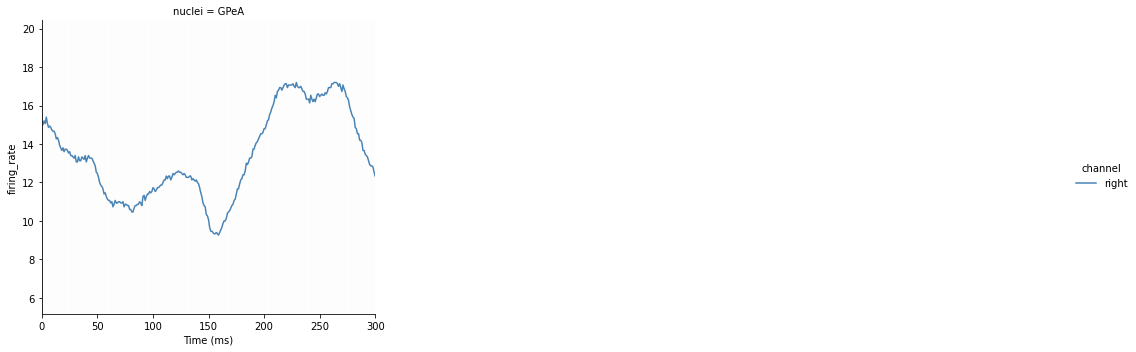

In [16]:
FR_fig_handles = plt_func.plot_fr_flex(firing_rates[0],datatables[0], ['right'], ['GPeA'], (0, 300)) 

In [17]:
import importlib

importlib.reload(plt_func)

<module 'plotting_functions' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_functions.py'>

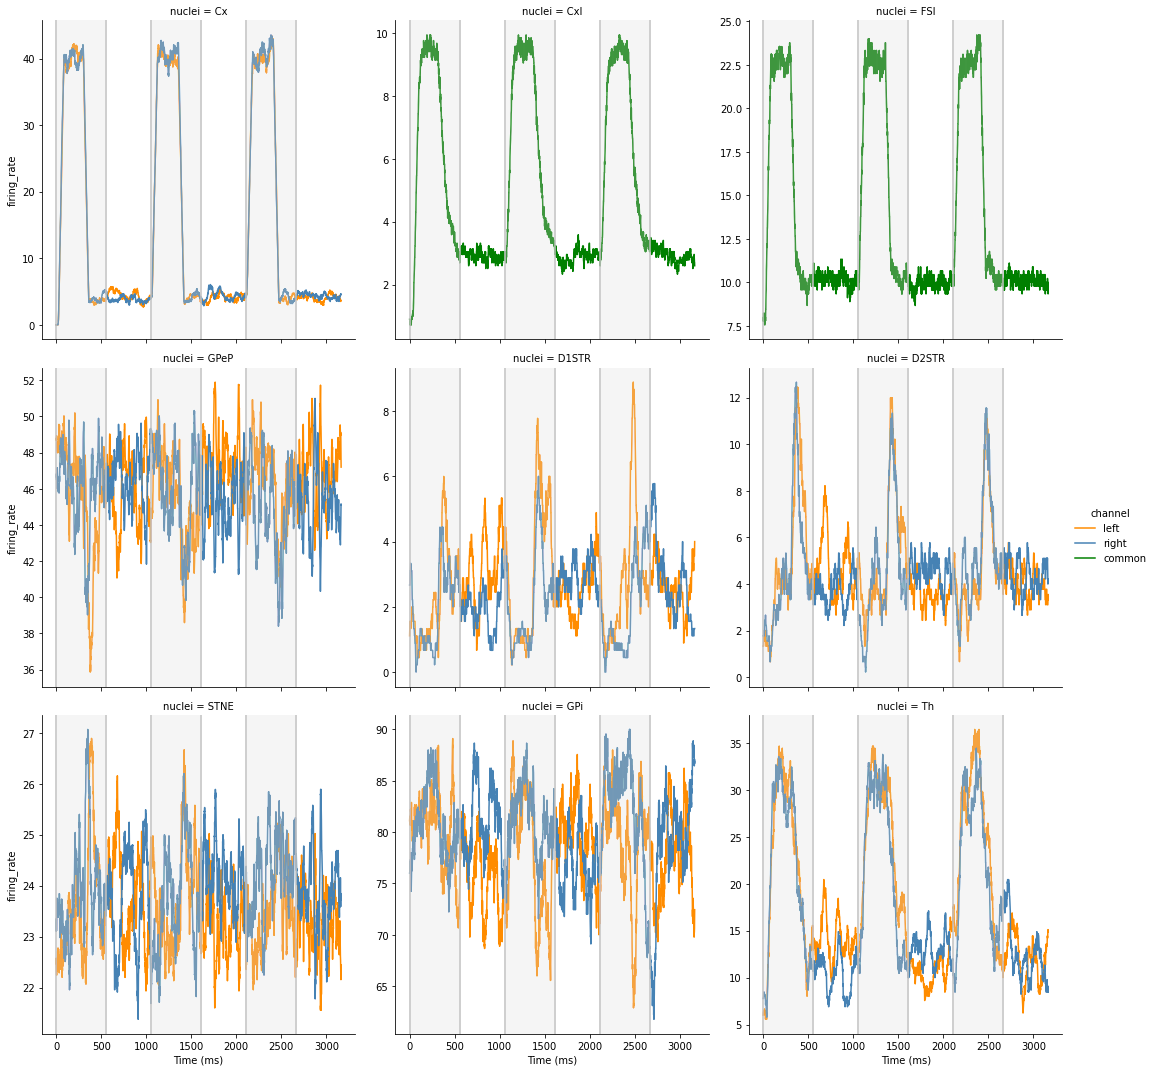

In [18]:
FR_fig_handles = plt_func.plot_fr(firing_rates, datatables)

In [ ]:
results[0]['datatables'].iloc[1].stimulusstarttime

In [ ]:
from matplotlib.lines import Line2D

f, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
plt_help.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax1[0])
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax1[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax1[0].set_xlabel('Time (ms)')
    ax1[0].title.set_text('D2STR')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c ='b', ax=ax1[1])
    #ax1[1].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[1].legend(['D1STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[1].set_xlabel('Time (ms)')
    ax1[1].title.set_text('D1STR')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    #ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[0].set_xlabel('Time (ms)')
    ax2[0].title.set_text('GPeP')
    #if results[0]['opt_signal_present'] == True:
        #ax2[0].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='darkmagenta', linewidth = 6)
       

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    #ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
       #ax1[1].hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[1].set_xlabel('Time (ms)')
    ax2[1].title.set_text('GPeA')
    if results[0]['opt_signal_present'] == True:
        ax2[1].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='mediumseagreen', linewidth = 6)
       
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    #ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    #ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    ax3[0].set_xlabel('Time (ms)')
    ax3[0].title.set_text('STNE')
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[1].vlines(j, 3, 137, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1], label='GPi')
    #ax3[1].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax3[1].set_xlabel('Time (ms)')
    ax3[1].title.set_text('GPi')
    
ax1[1].set_ylim(0, 120)
ax2[0].set_ylim(0, 120)
ax2[1].set_ylim(0, 120)
ax1[0].set_ylim(0, 120)
ax3[0].set_ylim(0, 120)
ax3[1].set_ylim(0, 120)

ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax2[0].get_legend().remove()
ax2[1].get_legend().remove()
ax3[0].get_legend().remove()
ax3[1].get_legend().remove()

#blue_patch = mpatches.Patch(color='blue', linestyle='dotted', linewidth=0.5, label='go')
#red_patch = mpatches.Patch(color='red', label='stop')
#fig.legend(handles=[blue_patch, red_patch])

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go'),
                   Line2D([0], [0], color='red', lw=3, linestyle='dotted', label='stop')]
ax1[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')

In [ ]:
import pylab as pl
from matplotlib.lines import Line2D

plt_help.rename_columns(results[0])
popfreqs = cbgt.collateVariable(results,'popfreqs')
datatables = cbgt.collateVariable(results,'datatables')

opt_input = np.array(results[0]['agent'].opt_inp)

f, (ax) = pl.subplots(1, 2, figsize=(16, 6), sharex=True)

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[0].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':') 
ax[0].plot(opt_input[:,0],label='GPeA-baseline', color = 'tab:green', linewidth = 2.5)
ax[0].legend()
ax[0].set_xlabel('Time (ms)')
ax[0].title.set_text('Input stimulus over baseline')


    #ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[1].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'orange',linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
ax[1].plot(results[0]['popfreqs']['GPeA_right'],label="D1STR-activity",color='b')
ax[1].legend()
ax[1].set_xlabel('Time (ms)')
ax[1].title.set_text('GPeA activity over 3 trials')
    
ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[1].set_ylim(0, 40)
ax[0].set_ylim(0, 40)

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go right'),
                   Line2D([0], [0], color='orange', lw=3, linestyle='dotted', label='go left')]
ax[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')


pl.show()